# Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
%matplotlib inline

# Informações

In [2]:
# baixar arquivo do jogo
df = pd.read_csv('df.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante,diferenca_placar_absoluto
0,6,3000.0,98,100,NaN,fim_partida,NaN,-2,2,2
1,6,3000.0,98,100,NaN,fim_quarto,NaN,-2,2,2
2,6,2996.0,98,100,COR,AS,Fischer,-2,2,2
3,6,2996.0,98,100,COR,3_Pts_C,Fuller,-2,2,2
4,6,2994.0,95,100,COR,RO,Renato,-5,5,5
...,...,...,...,...,...,...,...,...,...,...
647,1,0.0,0,0,COR,substituicao_entra,Miller,0,0,0
648,1,0.0,0,0,COR,substituicao_entra,L Cauê,0,0,0
649,1,0.0,0,0,COR,substituicao_entra,Fuller,0,0,0
650,1,0.0,0,0,COR,substituicao_entra,Fischer,0,0,0


In [3]:
# baixar arquivo das informações do jogo
inf = pd.read_csv('informacao_jogo.csv')
inf.drop(['Unnamed: 0'], axis=1, inplace=True)
inf

,Nomes,Siglas,Mandante,Classificação,Temporada,Dia,Arquivo,Imagem
0,Corinthians,COR,casa,1 Turno,2019,02/01/2021,informacoes_dos_times/Corinthians,informacoes_dos_times/Corinthians/Corinthians
1,Paulistano,CAP,fora,1 Turno,2019,02/01/2021,informacoes_dos_times/Paulistano,informacoes_dos_times/Paulistano/Paulistano


In [4]:
sigla_time_a = inf.loc[0, 'Siglas']
sigla_time_a

'COR'

In [5]:
sigla_time_b = inf.loc[1, 'Siglas']
sigla_time_b

'CAP'

In [6]:
nome_time_casa = inf.loc[0, 'Nomes']
nome_time_casa

'Corinthians'

In [7]:
nome_time_fora = inf.loc[1, 'Nomes']
nome_time_fora

'Paulistano'

# Análise da Posse de Bola dos times

In [8]:
posse_bola = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
                (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_T') |
                (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_T') |
                (df['Indicador'] == 'ER') | (df['Indicador'] == 'FC_O')|                
                (df['Indicador'] == 'EN') | (df['Indicador'] == 'fim_partida')]

In [9]:
# estamos invertendo os valores para deixar parecido com o jogo
posse_bola = posse_bola[::-1]
posse_bola.reset_index(drop=True, inplace=True)
posse_bola

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante,diferenca_placar_absoluto
0,1,23.0,0,0,CAP,3_Pts_T,Maique,0,0,0
1,1,34.0,0,0,CAP,2_Pts_T,Vitão,0,0,0
2,1,54.0,0,0,COR,ER,Arthur,0,0,0
3,1,60.0,0,2,CAP,2_Pts_C,Ruivo,-2,2,2
4,1,83.0,0,2,COR,2_Pts_T,Miller,-2,2,2
...,...,...,...,...,...,...,...,...,...,...
237,6,2987.0,95,100,CAP,LL_Pts_C,Ruivo,-5,5,5
238,6,2987.0,95,100,CAP,LL_Pts_T,Ruivo,-5,5,5
239,6,2991.0,95,100,COR,3_Pts_T,Siewert,-5,5,5
240,6,2996.0,98,100,COR,3_Pts_C,Fuller,-2,2,2


In [10]:
lstime_b = [[]]
lstime_a = [[]]

for a in posse_bola.itertuples():
    if a.Time not in [sigla_time_b]:
        idx = a.Index - 1
        if idx >= 0:
            cc = posse_bola.loc[idx]
            lss = [
                cc.Time,
                cc.Tempo,
                cc.Indicador,
                cc.diferenca_placar_casa,
                cc.diferenca_placar_visitante,
                cc.diferenca_placar_absoluto
            ]
            lstime_b.append(lss)
        else:
            pass

    if a.Time not in [sigla_time_a]:
        idx = a.Index - 1
        if idx >= 0:
            cc = posse_bola.loc[idx]
            lss = [
                cc.Time,
                cc.Tempo,
                cc.Indicador,
                cc.diferenca_placar_casa,
                cc.diferenca_placar_visitante,
                cc.diferenca_placar_absoluto
            ]
            lstime_a.append(lss)
        else:
            pass

In [11]:
df_time_b = pd.DataFrame(
    lstime_b, columns=["Time", "Tempo", "Indicador", "dif_casa", "dif_visita", "dif_abs"])

In [12]:
df_time_b.dropna(how="any", inplace=True, axis="index")
df_time_b = df_time_b[df_time_b.Time.str.contains(sigla_time_b)]

In [13]:
df_time_b

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs
1,CAP,34.0,2_Pts_T,0.0,0.0,0.0
2,CAP,60.0,2_Pts_C,-2.0,2.0,2.0
3,CAP,99.0,2_Pts_T,-2.0,2.0,2.0
4,CAP,150.0,ER,-2.0,2.0,2.0
5,CAP,189.0,2_Pts_T,0.0,0.0,0.0
...,...,...,...,...,...,...
104,CAP,2929.0,3_Pts_C,-7.0,7.0,7.0
106,CAP,2966.0,ER,-4.0,4.0,4.0
108,CAP,2974.0,LL_Pts_C,-6.0,6.0,6.0
110,CAP,2981.0,LL_Pts_C,-6.0,6.0,6.0


In [14]:
df_time_a = pd.DataFrame(
    lstime_a, columns=["Time", "Tempo", "Indicador", "dif_casa", "dif_visita", "dif_abs"])

In [15]:
df_time_a.dropna(how="any", inplace=True, axis="index")
df_time_a = df_time_a[df_time_a.Time.str.contains(sigla_time_a)]

In [16]:
df_time_a

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs
2,COR,54.0,ER,0.0,0.0,0.0
3,COR,83.0,2_Pts_T,-2.0,2.0,2.0
4,COR,111.0,ER,-2.0,2.0,2.0
7,COR,163.0,2_Pts_C,0.0,0.0,0.0
9,COR,202.0,3_Pts_T,0.0,0.0,0.0
...,...,...,...,...,...,...
122,COR,2944.0,3_Pts_C,-4.0,4.0,4.0
123,COR,2968.0,LL_Pts_T,-4.0,4.0,4.0
125,COR,2978.0,LL_Pts_C,-4.0,4.0,4.0
127,COR,2986.0,2_Pts_C,-4.0,4.0,4.0


In [17]:
posse_de_bola = pd.concat([df_time_b, df_time_a], ignore_index=True)
posse_de_bola.sort_values(by="Tempo", inplace=True)
posse_de_bola.reset_index(inplace=True, drop=True)

In [18]:
posse_de_bola["Tempo_Fim"] = posse_de_bola["Tempo"]
tempo = posse_de_bola["Tempo"].diff()
tempo.loc[0] = posse_de_bola["Tempo"].loc[0]
posse_de_bola["Tempo"] = tempo
posse_de_bola

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim
0,CAP,34.0,2_Pts_T,0.0,0.0,0.0,34.0
1,COR,20.0,ER,0.0,0.0,0.0,54.0
2,CAP,6.0,2_Pts_C,-2.0,2.0,2.0,60.0
3,COR,23.0,2_Pts_T,-2.0,2.0,2.0,83.0
4,CAP,16.0,2_Pts_T,-2.0,2.0,2.0,99.0
...,...,...,...,...,...,...,...
169,COR,4.0,LL_Pts_C,-4.0,4.0,4.0,2978.0
170,CAP,3.0,LL_Pts_C,-6.0,6.0,6.0,2981.0
171,COR,5.0,2_Pts_C,-4.0,4.0,4.0,2986.0
172,CAP,1.0,LL_Pts_T,-5.0,5.0,5.0,2987.0


In [19]:
# Utilizando a diferença do placar entre casa e visitante, aplicando diff (diferença entre as linhas) 
# e usando seu valor absoluto (abs())
# nós podemos encontrar o valor de cada indicador técnico 
posse_de_bola["pontuacao"] = posse_de_bola["dif_casa"].diff()
posse_de_bola["pontuacao"] = posse_de_bola["pontuacao"].apply(lambda x: abs(x))

In [20]:
# como o primeiro valor some quando fazemos a diff e esse primeiro valor é importante pq é o primeiro ponto, nós adicionamos ele
novo_valor = posse_de_bola["dif_casa"][0]
posse_de_bola.loc[0, 'pontuacao'] = abs(novo_valor)

In [21]:
# questão de precaução 
posse_de_bola.reset_index(inplace=True, drop=True)
posse_de_bola

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,CAP,34.0,2_Pts_T,0.0,0.0,0.0,34.0,0.0
1,COR,20.0,ER,0.0,0.0,0.0,54.0,0.0
2,CAP,6.0,2_Pts_C,-2.0,2.0,2.0,60.0,2.0
3,COR,23.0,2_Pts_T,-2.0,2.0,2.0,83.0,0.0
4,CAP,16.0,2_Pts_T,-2.0,2.0,2.0,99.0,0.0
...,...,...,...,...,...,...,...,...
169,COR,4.0,LL_Pts_C,-4.0,4.0,4.0,2978.0,2.0
170,CAP,3.0,LL_Pts_C,-6.0,6.0,6.0,2981.0,2.0
171,COR,5.0,2_Pts_C,-4.0,4.0,4.0,2986.0,2.0
172,CAP,1.0,LL_Pts_T,-5.0,5.0,5.0,2987.0,1.0


In [22]:
# salvar arquivo da posse de bola do time
posse_de_bola.to_csv('posse_bola.csv')

# Gráfico do tempo da posse de bola

In [23]:
lu_time_a = posse_de_bola
lu_time_a['Time_Novo'] = 0

In [24]:
for x in range(len(posse_de_bola)):
    if lu_time_a['Time'][x] == sigla_time_a:
        lu_time_a.loc[x, 'Time_Novo'] = lu_time_a['Tempo'][x]
    else:
        pass

In [25]:
lu_time_a

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao,Time_Novo
0,CAP,34.0,2_Pts_T,0.0,0.0,0.0,34.0,0.0,0.0
1,COR,20.0,ER,0.0,0.0,0.0,54.0,0.0,20.0
2,CAP,6.0,2_Pts_C,-2.0,2.0,2.0,60.0,2.0,0.0
3,COR,23.0,2_Pts_T,-2.0,2.0,2.0,83.0,0.0,23.0
4,CAP,16.0,2_Pts_T,-2.0,2.0,2.0,99.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
169,COR,4.0,LL_Pts_C,-4.0,4.0,4.0,2978.0,2.0,4.0
170,CAP,3.0,LL_Pts_C,-6.0,6.0,6.0,2981.0,2.0,0.0
171,COR,5.0,2_Pts_C,-4.0,4.0,4.0,2986.0,2.0,5.0
172,CAP,1.0,LL_Pts_T,-5.0,5.0,5.0,2987.0,1.0,0.0


In [26]:
grafico_posse_time1 = lu_time_a
grafico_posse_time1.reset_index(inplace=True)
grafico_posse_time1

,index,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao,Time_Novo
0,0,CAP,34.0,2_Pts_T,0.0,0.0,0.0,34.0,0.0,0.0
1,1,COR,20.0,ER,0.0,0.0,0.0,54.0,0.0,20.0
2,2,CAP,6.0,2_Pts_C,-2.0,2.0,2.0,60.0,2.0,0.0
3,3,COR,23.0,2_Pts_T,-2.0,2.0,2.0,83.0,0.0,23.0
4,4,CAP,16.0,2_Pts_T,-2.0,2.0,2.0,99.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
169,169,COR,4.0,LL_Pts_C,-4.0,4.0,4.0,2978.0,2.0,4.0
170,170,CAP,3.0,LL_Pts_C,-6.0,6.0,6.0,2981.0,2.0,0.0
171,171,COR,5.0,2_Pts_C,-4.0,4.0,4.0,2986.0,2.0,5.0
172,172,CAP,1.0,LL_Pts_T,-5.0,5.0,5.0,2987.0,1.0,0.0


In [27]:
x = grafico_posse_time1['index']
my_xticks = x
frequency = 10

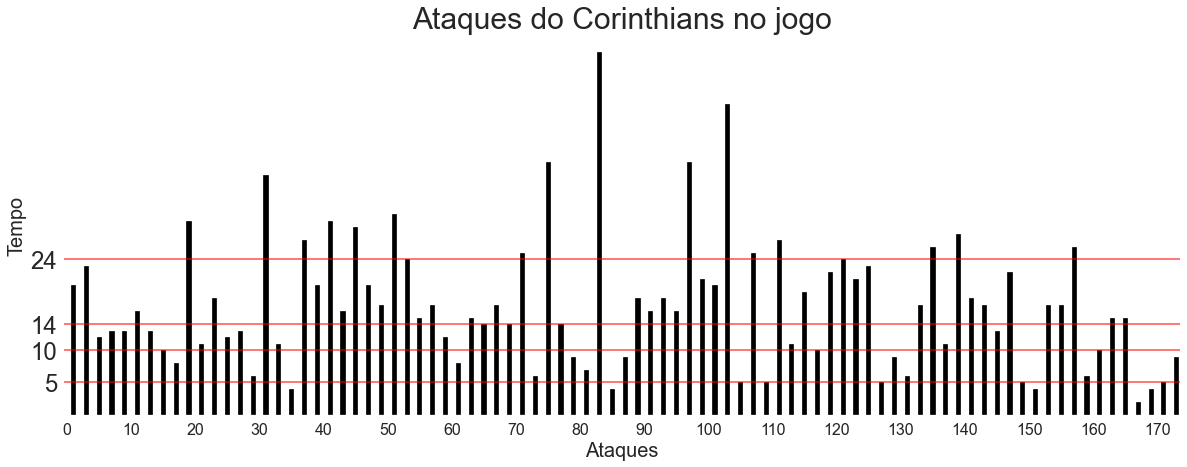

In [28]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Time_Novo', data=grafico_posse_time1, color='black')
plt.title(f'Ataques do {nome_time_casa} no jogo', fontsize=30)
plt.yticks([5,10,14,24], fontsize=24)
plt.ylabel('Tempo', fontsize=20)
plt.xlabel('Ataques', fontsize=20)
plt.xticks(x[::frequency], my_xticks[::frequency], fontsize=16)
plt.axhline(24, color='red', alpha=0.6, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.6, label = '14 segundos')
plt.axhline(10, color='red', alpha=0.6, label = '10 segundos')
plt.axhline(5, color='red', alpha=0.6, label = '5 segundos')
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste3.png', format='png')

In [29]:
lu_time_b = posse_de_bola
lu_time_b['Time_Novo'] = 0

In [30]:
for x in range(len(posse_de_bola)):
    if lu_time_b['Time'][x] == sigla_time_b:
        lu_time_b.loc[x,'Time_Novo'] = lu_time_b['Tempo'][x]
    else:
        pass

In [31]:
lu_time_b

,index,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao,Time_Novo
0,0,CAP,34.0,2_Pts_T,0.0,0.0,0.0,34.0,0.0,34.0
1,1,COR,20.0,ER,0.0,0.0,0.0,54.0,0.0,0.0
2,2,CAP,6.0,2_Pts_C,-2.0,2.0,2.0,60.0,2.0,6.0
3,3,COR,23.0,2_Pts_T,-2.0,2.0,2.0,83.0,0.0,0.0
4,4,CAP,16.0,2_Pts_T,-2.0,2.0,2.0,99.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...
169,169,COR,4.0,LL_Pts_C,-4.0,4.0,4.0,2978.0,2.0,0.0
170,170,CAP,3.0,LL_Pts_C,-6.0,6.0,6.0,2981.0,2.0,3.0
171,171,COR,5.0,2_Pts_C,-4.0,4.0,4.0,2986.0,2.0,0.0
172,172,CAP,1.0,LL_Pts_T,-5.0,5.0,5.0,2987.0,1.0,1.0


In [32]:
grafico_posse_time2 = lu_time_b
grafico_posse_time2.reset_index(inplace=True)
grafico_posse_time2

,level_0,index,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao,Time_Novo
0,0,0,CAP,34.0,2_Pts_T,0.0,0.0,0.0,34.0,0.0,34.0
1,1,1,COR,20.0,ER,0.0,0.0,0.0,54.0,0.0,0.0
2,2,2,CAP,6.0,2_Pts_C,-2.0,2.0,2.0,60.0,2.0,6.0
3,3,3,COR,23.0,2_Pts_T,-2.0,2.0,2.0,83.0,0.0,0.0
4,4,4,CAP,16.0,2_Pts_T,-2.0,2.0,2.0,99.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
169,169,169,COR,4.0,LL_Pts_C,-4.0,4.0,4.0,2978.0,2.0,0.0
170,170,170,CAP,3.0,LL_Pts_C,-6.0,6.0,6.0,2981.0,2.0,3.0
171,171,171,COR,5.0,2_Pts_C,-4.0,4.0,4.0,2986.0,2.0,0.0
172,172,172,CAP,1.0,LL_Pts_T,-5.0,5.0,5.0,2987.0,1.0,1.0


In [33]:
x2 = grafico_posse_time2['index']
my_xticks2 = x2
frequency2 = 10

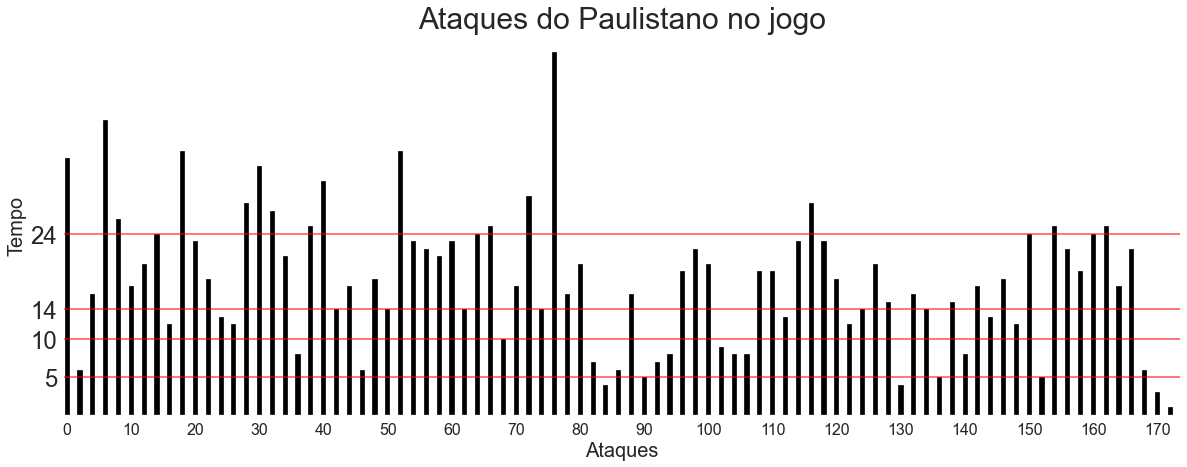

In [34]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Time_Novo', data=grafico_posse_time2, color='black')
plt.title(f'Ataques do {nome_time_fora} no jogo', fontsize=30)
plt.yticks([5,10,14,24], fontsize=24)
plt.ylabel('Tempo', fontsize=20)
plt.xlabel('Ataques', fontsize=20)
plt.xticks(x2[::frequency2], my_xticks2[::frequency2], fontsize=16)
plt.axhline(24, color='red', alpha=0.6, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.6, label = '14 segundos')
plt.axhline(10, color='red', alpha=0.6, label = '10 segundos')
plt.axhline(5, color='red', alpha=0.6, label = '5 segundos')
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste4.png', format='png')

# Situações Especiais

In [35]:
# A variável df_time_a e df_time_b foram anteriormentes utilizadas sem a pontuação dos indicadoores
# Agora vamos redefinir essas variáveis com a pontuação

In [36]:
posse_de_bola

,level_0,index,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao,Time_Novo
0,0,0,CAP,34.0,2_Pts_T,0.0,0.0,0.0,34.0,0.0,34.0
1,1,1,COR,20.0,ER,0.0,0.0,0.0,54.0,0.0,0.0
2,2,2,CAP,6.0,2_Pts_C,-2.0,2.0,2.0,60.0,2.0,6.0
3,3,3,COR,23.0,2_Pts_T,-2.0,2.0,2.0,83.0,0.0,0.0
4,4,4,CAP,16.0,2_Pts_T,-2.0,2.0,2.0,99.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
169,169,169,COR,4.0,LL_Pts_C,-4.0,4.0,4.0,2978.0,2.0,0.0
170,170,170,CAP,3.0,LL_Pts_C,-6.0,6.0,6.0,2981.0,2.0,3.0
171,171,171,COR,5.0,2_Pts_C,-4.0,4.0,4.0,2986.0,2.0,0.0
172,172,172,CAP,1.0,LL_Pts_T,-5.0,5.0,5.0,2987.0,1.0,1.0


In [37]:
posse_de_bola.drop('level_0', axis=1, inplace=True)
posse_de_bola.drop('index', axis=1, inplace=True)
posse_de_bola.drop('Time_Novo', axis=1, inplace=True)

In [38]:
df_time_b = posse_de_bola[posse_de_bola.loc[:,'Time'] == sigla_time_b]
df_time_b.reset_index(inplace=True, drop=True)
df_time_b

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,CAP,34.0,2_Pts_T,0.0,0.0,0.0,34.0,0.0
1,CAP,6.0,2_Pts_C,-2.0,2.0,2.0,60.0,2.0
2,CAP,16.0,2_Pts_T,-2.0,2.0,2.0,99.0,0.0
3,CAP,39.0,ER,-2.0,2.0,2.0,150.0,0.0
4,CAP,26.0,2_Pts_T,0.0,0.0,0.0,189.0,0.0
...,...,...,...,...,...,...,...,...
82,CAP,17.0,3_Pts_C,-7.0,7.0,7.0,2929.0,3.0
83,CAP,22.0,ER,-4.0,4.0,4.0,2966.0,0.0
84,CAP,6.0,LL_Pts_C,-6.0,6.0,6.0,2974.0,2.0
85,CAP,3.0,LL_Pts_C,-6.0,6.0,6.0,2981.0,2.0


In [39]:
df_time_a = posse_de_bola[posse_de_bola.loc[:,'Time'] == sigla_time_a]
df_time_a.reset_index(inplace=True, drop=True)
df_time_a

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,COR,20.0,ER,0.0,0.0,0.0,54.0,0.0
1,COR,23.0,2_Pts_T,-2.0,2.0,2.0,83.0,0.0
2,COR,12.0,ER,-2.0,2.0,2.0,111.0,0.0
3,COR,13.0,2_Pts_C,0.0,0.0,0.0,163.0,2.0
4,COR,13.0,3_Pts_T,0.0,0.0,0.0,202.0,0.0
...,...,...,...,...,...,...,...,...
82,COR,15.0,3_Pts_C,-4.0,4.0,4.0,2944.0,3.0
83,COR,2.0,LL_Pts_T,-4.0,4.0,4.0,2968.0,0.0
84,COR,4.0,LL_Pts_C,-4.0,4.0,4.0,2978.0,2.0
85,COR,5.0,2_Pts_C,-4.0,4.0,4.0,2986.0,2.0


In [40]:
especial_a = []
especial_b = []
for i in range(len(df_time_a)):
    if (df_time_a.Indicador[i] == 'LL_Pts_C') & (df_time_a.pontuacao[i] > 2):
        valo_a = df_time_a.pontuacao[i]
        especial_a.append(valo_a)
    elif (df_time_a.Indicador[i] == 'LL_Pts_T') & (df_time_a.pontuacao[i] >= 2):
        valo_a = df_time_a.pontuacao[i]
        especial_a.append(valo_a)
for i in range(len(df_time_b)):
    if (df_time_b.Indicador[i] == 'LL_Pts_C') & (df_time_b.pontuacao[i] > 2):
        valo_b = df_time_b.pontuacao[i]
        especial_b.append(valo_b)
    elif (df_time_b.Indicador[i] == 'LL_Pts_T') & (df_time_b.pontuacao[i] >= 2):
        valo_b = df_time_b.pontuacao[i]
        especial_b.append(valo_b)

In [41]:
especial = [len(especial_a), len(especial_b)]
especial

[4, 5]

# Análises descritiva da posse de bola

In [42]:
soma_a = df_time_a['Indicador'].value_counts().sum()
soma_b = df_time_b['Indicador'].value_counts().sum()

In [43]:
contagem = pd.DataFrame()
contagem = contagem.append(df_time_a['Indicador'].value_counts(), ignore_index=True)
contagem = contagem.append(df_time_b['Indicador'].value_counts(), ignore_index=True)
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,EN,ER,LL_Pts_C,LL_Pts_T
0,17.0,18.0,14.0,10.0,1.0,17.0,8.0,2.0
1,19.0,18.0,8.0,10.0,2.0,14.0,13.0,3.0


In [44]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna = []
for i in contagem:
    valores_coluna.append(i)
    
if 'EN' not in valores_coluna:
    contagem['EN'] = [0.0, 0.0]
if 'LL_Pts_T' not in valores_coluna:
    contagem['LL_Pts_T'] = [0.0, 0.0]
if 'LL_Pts_C' not in valores_coluna:
    contagem['LL_Pts_C'] = [0.0, 0.0]
# substituir os valores NAN por 0(zero)
contagem.fillna(0, inplace=True)
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,EN,ER,LL_Pts_C,LL_Pts_T
0,17.0,18.0,14.0,10.0,1.0,17.0,8.0,2.0
1,19.0,18.0,8.0,10.0,2.0,14.0,13.0,3.0


In [45]:
contagem.loc[0, '2_Pts_C'] = contagem['2_Pts_C'][0] + contagem['EN'][0]
contagem.loc[1, '2_Pts_C'] = contagem['2_Pts_C'][1] + contagem['EN'][1]

In [46]:
contagem.drop('EN', inplace=True, axis=1)
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,ER,LL_Pts_C,LL_Pts_T
0,18.0,18.0,14.0,10.0,17.0,8.0,2.0
1,21.0,18.0,8.0,10.0,14.0,13.0,3.0


In [47]:
# Retirar as situações especiais
# faltas depois de dois pontos convertidos 
# arremesso de 3 pontos com falta
# arremesso de dois convertido, mas errou LL
contagem['Especiais'] = especial
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,ER,LL_Pts_C,LL_Pts_T,Especiais
0,18.0,18.0,14.0,10.0,17.0,8.0,2.0,4
1,21.0,18.0,8.0,10.0,14.0,13.0,3.0,5


In [48]:
contagem.rename(columns={"2_Pts_T": "2_Pts_E", "3_Pts_T": "3_Pts_E", "LL_Pts_T": "LL_Pts_E"}, inplace=True)
contagem

,2_Pts_C,2_Pts_E,3_Pts_C,3_Pts_E,ER,LL_Pts_C,LL_Pts_E,Especiais
0,18.0,18.0,14.0,10.0,17.0,8.0,2.0,4
1,21.0,18.0,8.0,10.0,14.0,13.0,3.0,5


In [49]:
contagem['2_Pts_T'] = contagem['2_Pts_C'] + contagem['2_Pts_E']
contagem['3_Pts_T'] = contagem['3_Pts_C'] + contagem['3_Pts_E']
contagem['LL_Pts_T'] = contagem['LL_Pts_C'] + contagem['LL_Pts_E']

In [50]:
contagem['Time'] = [sigla_time_a, sigla_time_b]
contagem['posse'] = [soma_a, soma_b]
contagem['%2_Pts_C'] = [round((contagem['2_Pts_C'][0]/soma_a)*100), round((contagem['2_Pts_C'][1]/soma_b)*100)]
contagem['%2_Pts_E'] = [round((contagem['2_Pts_E'][0]/soma_a)*100), round((contagem['2_Pts_E'][1]/soma_b)*100)]
contagem['%3_Pts_C'] = [round((contagem['3_Pts_C'][0]/soma_a)*100), round((contagem['3_Pts_C'][1]/soma_b)*100)]
contagem['%3_Pts_E'] = [round((contagem['3_Pts_E'][0]/soma_a)*100), round((contagem['3_Pts_E'][1]/soma_b)*100)]
contagem['%LL_Pts_C'] = [round((contagem['LL_Pts_C'][0]/soma_a)*100), round((contagem['LL_Pts_C'][1]/soma_b)*100)]
contagem['%LL_Pts_E'] = [round((contagem['LL_Pts_E'][0]/soma_a)*100), round((contagem['LL_Pts_E'][1]/soma_b)*100)]
contagem['Tempo_de_posse'] = [(round(posse_de_bola.loc[posse_de_bola['Time'] == sigla_time_a].Tempo.sum()/60)),
                              (round(posse_de_bola.loc[posse_de_bola['Time'] == sigla_time_b].Tempo.sum()/60))]
contagem['Ataques/min'] = [(round(contagem['posse'][0]/contagem['Tempo_de_posse'][0], 2)),
                           (round(contagem['posse'][1]/contagem['Tempo_de_posse'][1], 2))]

In [51]:
contagem = contagem[['Time', 'posse', 'Tempo_de_posse', 'Ataques/min',
                     '2_Pts_C', '2_Pts_E', '2_Pts_T',
                     '3_Pts_C', '3_Pts_E', '3_Pts_T',
                     'LL_Pts_C', 'LL_Pts_E', 'LL_Pts_T', 
                     'Especiais', 'ER',
                     '%2_Pts_C', '%2_Pts_E', '%3_Pts_C',
                     '%3_Pts_E', '%LL_Pts_C', '%LL_Pts_E']]
contagem

,Time,posse,Tempo_de_posse,Ataques/min,2_Pts_C,2_Pts_E,2_Pts_T,3_Pts_C,3_Pts_E,3_Pts_T,...,LL_Pts_E,LL_Pts_T,Especiais,ER,%2_Pts_C,%2_Pts_E,%3_Pts_C,%3_Pts_E,%LL_Pts_C,%LL_Pts_E
0,COR,87,24.0,3.62,18.0,18.0,36.0,14.0,10.0,24.0,...,2.0,10.0,4,17.0,21.0,21.0,16.0,11.0,9.0,2.0
1,CAP,87,26.0,3.35,21.0,18.0,39.0,8.0,10.0,18.0,...,3.0,16.0,5,14.0,24.0,21.0,9.0,11.0,15.0,3.0


# Gráfico da Contagem

In [52]:
contagem = contagem.T
contagem.rename(columns={0: sigla_time_a, 1: sigla_time_b}, inplace=True)

In [53]:
contagem_grafico = contagem.loc[['2_Pts_C', '2_Pts_T', '3_Pts_C', '3_Pts_T','LL_Pts_C', 'LL_Pts_T', 'Especiais', 'ER']]
contagem_grafico

,COR,CAP
2_Pts_C,18,21
2_Pts_T,36,39
3_Pts_C,14,8
3_Pts_T,24,18
LL_Pts_C,8,13
LL_Pts_T,10,16
Especiais,4,5
ER,17,14


# Gráfico dos indicadores técnicos

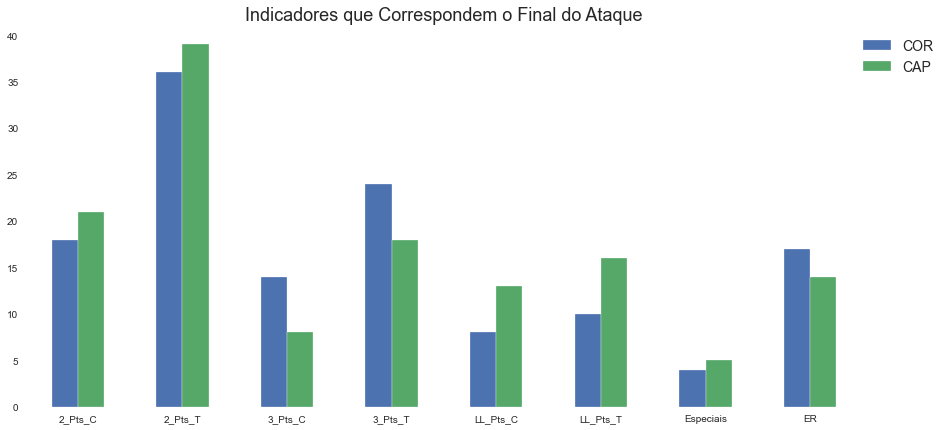

In [54]:
sns.set_style('white')
contagem_grafico.plot.bar(rot=0, figsize=(15,7))
plt.title('Indicadores que Correspondem o Final do Ataque', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})

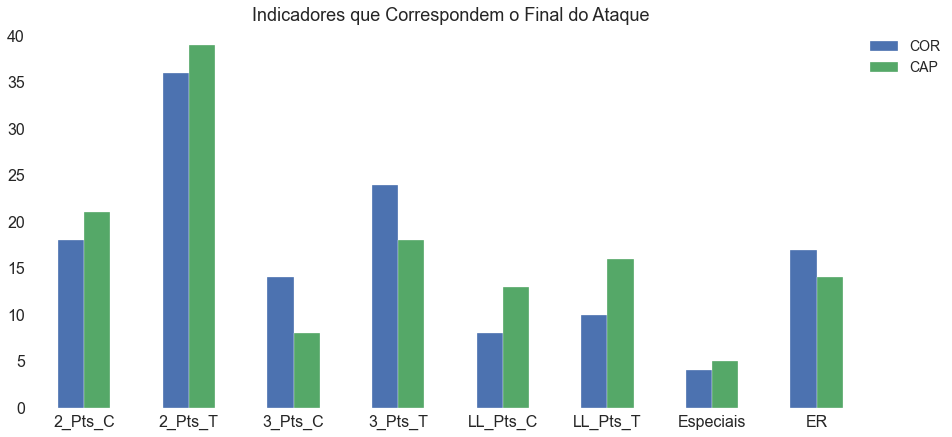

In [55]:
sns.set_style('white')
contagem_grafico.plot.bar(rot=0, figsize=(15,7))
plt.title('Indicadores que Correspondem o Final do Ataque', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})

In [56]:
posse_de_bola_b = posse_de_bola[posse_de_bola['Time'] == sigla_time_b]
v1 = len(posse_de_bola_b[posse_de_bola_b['Tempo'] <= 5])
v2 = len(posse_de_bola_b[(posse_de_bola_b['Tempo'] > 5) & (posse_de_bola_b['Tempo'] <= 10)])
v3 = len(posse_de_bola_b[(posse_de_bola_b['Tempo'] > 10) & (posse_de_bola_b['Tempo'] <= 14)])
v4 = len(posse_de_bola_b[(posse_de_bola_b['Tempo'] > 14) & (posse_de_bola_b['Tempo'] <= 24)])
v5 = len(posse_de_bola_b[posse_de_bola_b['Tempo'] > 24])
valores_b = {f'{sigla_time_b}':(v1, v2, v3, v4, v5)}
valores_b

{'CAP': (7, 13, 13, 38, 16)}

In [57]:
posse_de_bola_a = posse_de_bola[posse_de_bola['Time'] == sigla_time_a]
v1 = len(posse_de_bola_a[posse_de_bola_a['Tempo'] <= 5])
v2 = len(posse_de_bola_a[(posse_de_bola_a['Tempo'] > 5) & (posse_de_bola_a['Tempo'] <= 10)])
v3 = len(posse_de_bola_a[(posse_de_bola_a['Tempo'] > 10) & (posse_de_bola_a['Tempo'] <= 14)])
v4 = len(posse_de_bola_a[(posse_de_bola_a['Tempo'] > 14) & (posse_de_bola_a['Tempo'] <= 24)])
v5 = len(posse_de_bola_a[posse_de_bola_a['Tempo'] > 24])
valores_a = {f'{sigla_time_a}':(v1, v2, v3, v4, v5)}
valores_a

{'COR': (10, 14, 15, 32, 16)}

In [58]:
# tempo de ataque separado por cada ataque 
# juntar valores de A e valores de B
valores_a.update(valores_b)
tempos = ('0=>X<=5', '5>X<=10', '10>X<=14', '14>X<=24', 'X>24')
ataques = pd.DataFrame(data=valores_a, index=tempos)
ataques

,COR,CAP
0=>X<=5,10,7
5>X<=10,14,13
10>X<=14,15,13
14>X<=24,32,38
X>24,16,16


In [99]:
sub = df[df['Indicador']=='substituicao_sai']
tres_p = df[(df['Indicador']=='3_Pts_C')|(df['Indicador']=='3_Pts_T')]
dois_p = df[(df['Indicador']=='2_Pts_C')| (df['Indicador']=='2_Pts_T')]
ll_p = df[(df['Indicador']=='LL_C')|(df['Indicador']=='LL_T')]
er = df[df['Indicador']=='ER']
tet = df[df['Indicador']=='tempo_tecnico']

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante,diferenca_placar_absoluto
38,6,2931.0,88,95,COR,tempo_tecnico,Corinthians,-7,7,7
82,5,2673.0,80,80,CAP,tempo_tecnico,Paulistano,0,0,0
91,5,2669.0,78,80,COR,tempo_tecnico,Corinthians,-2,2,2
158,4,2392.0,68,68,COR,tempo_tecnico,Corinthians,0,0,0
171,4,2388.0,68,66,CAP,tempo_tecnico,Paulistano,2,-2,2
186,4,2360.0,67,66,COR,tempo_tecnico,Corinthians,1,-1,1
198,4,2260.0,67,64,CAP,tempo_tecnico,Paulistano,3,-3,3
229,4,2102.0,62,56,CAP,tempo_tecnico,Paulistano,6,-6,6
289,3,1726.0,48,47,COR,tempo_tecnico,Corinthians,1,-1,1
399,2,1189.0,31,28,COR,tempo_tecnico,Corinthians,3,-3,3


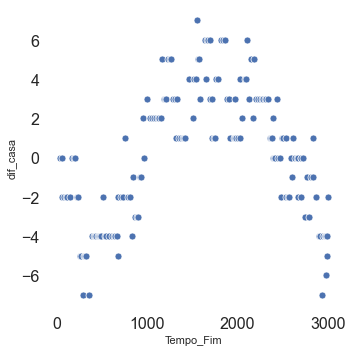

In [79]:
sns.relplot(data=posse_de_bola, x='Tempo_Fim', y='dif_casa')

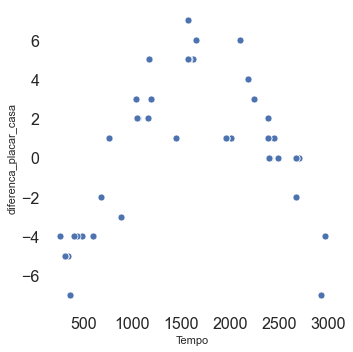

In [80]:
sns.relplot(data=sub, x='Tempo', y='diferenca_placar_casa')

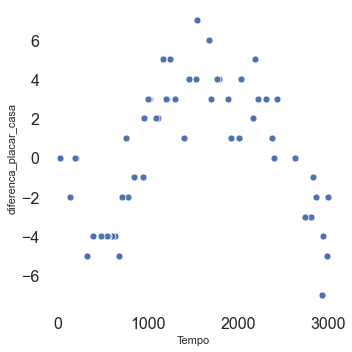

In [90]:
sns.relplot(data=tres_p, x='Tempo', y='diferenca_placar_casa')

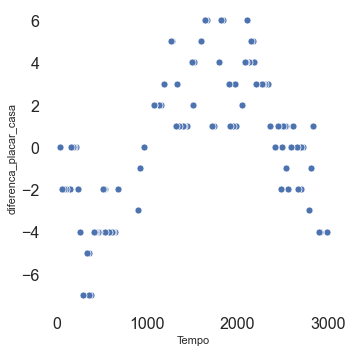

In [91]:
sns.relplot(data=dois_p, x='Tempo', y='diferenca_placar_casa')

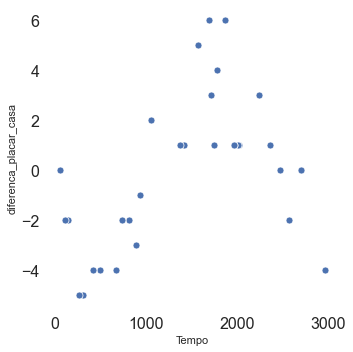

In [97]:
sns.relplot(data=er, x='Tempo', y='diferenca_placar_casa')

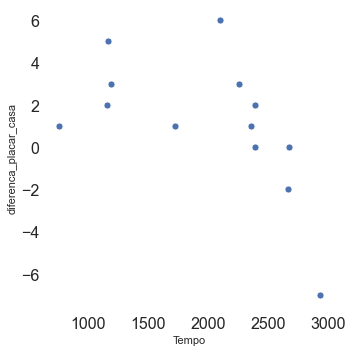

In [100]:
sns.relplot(data=tet, x='Tempo', y='diferenca_placar_casa')

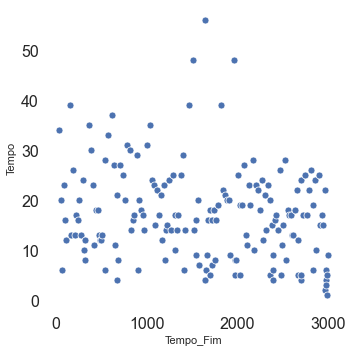

In [85]:
sns.relplot(data=posse_de_bola, x='Tempo_Fim', y='Tempo')